# Reporte de práctica 6: Modelos lineales con scipy.stats

En ésta practica tratamos de buscar al menos dos modelos lineales en los datos del cine.  

## Iniciar los datos

Queremos probar si la categoría eligieron para su clip, esta relacionado de alguna forma con el país de procedencia y por año de participacion.

Primero importamos el archivo que esta en github que tiene informacion limpia de prácticas pasadas.

In [105]:
import pandas as pd
from numpy import isnan
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from pandas.compat import u

cine = pd.read_csv('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/datosLimpiosCine2.csv', sep='\\')
print(len(cine))
cine = cine.dropna()
print(len(cine))

2735
2277


Para evitar errores de calculos, usando la función dropna() retiramos todos los registros que tengan algún campo vacio y nos deshacemos de 458 registros que no tenian genero o tipo de celular y nos quedamos con 2277 registros válidos.

## Categorizaciones

Como tenemos muchas cadenas de texto en nuestros datos, es importante hacer categorizaciones ya que hacemos conteos de la informacion que tenemos disponible y así poder hacer calculos estadisticos.

### Categorias por país
Aplicamos una categorizacion por país, pero se removieron los datos que involucran a México y Colombia que son los paises anfitriones del concurso y por ende son los que nos sesgan la información, entonces esta informacion será relevante a los paises extranjeros que participan.

In [106]:
paises = cine['País'].unique()

listaPaises = []
for country in paises:
    listaPaises.append([country,cine[(cine['País']==country) & (cine['Año']==2015)].count()['Año'],cine[(cine['País']==country) & (cine['Año']==2016)].count()['Año'],cine[(cine['País']==country) & (cine['Año']==2017)].count()['Año'],cine[(cine['País']==country) & (cine['Año']==2018)].count()['Año'],cine[cine['País']==country].count()['Año']])
#print(listaPaises)
listaPaises.pop(0)
listaPaises.pop(1)

dfpais = pd.DataFrame(data=listaPaises)
dfpais.columns = ['Pais', '2015', '2016', '2017', '2018', 'Total']
print(dfpais)

                    Pais  2015  2016  2017  2018  Total
0                 España     7     8     1     5     21
1                Ecuador     2     3     0     0      5
2                Francia     2     1     0     0      3
3              Venezuela     3     1     1     0      5
4              Argentina     1     3     3     1      8
5                   Perú     1     0     0     0      1
6         Estados Unidos     3     3     3     2     11
7                 Brasil     2     1     0     0      3
8                   Cuba     1     0     0     0      1
9               Alemania     0     1     0     0      1
10         Internacional     0     5    11     0     16
11             Marruecos     0     1     0     0      1
12               Uruguay     0     1     0     0      1
13  Republica Dominicana     0     1     0     0      1
14                Canadá     0     1     0     0      1
15            Afganistán     0     0    16     0     16
16               Comoras     0     0     1     0

Al aplicar pruebas de normalidad a los datos, podemos observar que no ésta presente la normalidad.

(0.5631282329559326, 6.444122037201072e-13, 0.05, 'no normal')
(0.5631282329559326, 6.444122037201072e-13, 0.01, 'no normal')


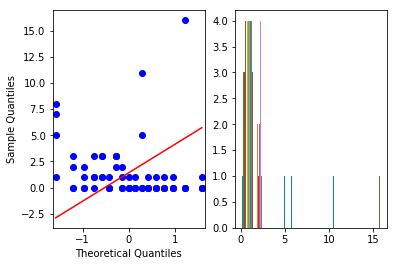

In [107]:
f, ax = plt.subplots(1, 2)
dfpais2=dfpais[['2015','2016','2017','2018']].copy()
qqplot(dfpais2, line='s', ax = ax[0])
ax[1] = plt.hist(dfpais2)
for a in [0.05, 0.01]:
    s, p = shapiro(dfpais2)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

Tambien categorizamos la Categoría del corto, y tambien se clasificó por año.

In [108]:
categorias = cine['Categoría'].unique()
listaCategoria = []
for cat in categorias:
    listaCategoria.append([cat,cine[(cine['Categoría']==cat) & (cine['Año']==2015) & (cine['País']!='Colombia')& (cine['País']!='México')].count()['Año'],cine[(cine['Categoría']==cat) & (cine['Año']==2016)& (cine['País']!='Colombia')& (cine['País']!='México')].count()['Año'],cine[(cine['Categoría']==cat) & (cine['Año']==2017)& (cine['País']!='Colombia')& (cine['País']!='México')].count()['Año'],cine[(cine['Categoría']==cat) & (cine['Año']==2018)& (cine['País']!='Colombia')& (cine['País']!='México')].count()['Año'],cine[(cine['Categoría']==cat) & (cine['País']!='Colombia')& (cine['País']!='México')].count()['Año']])

dfcat = pd.DataFrame(data=listaCategoria)
dfcat.columns = ['Categoria', '2015', '2016', '2017', '2018', 'Total']
print(dfcat)


     Categoria  2015  2016  2017  2018  Total
0   Aficionado    13    16    11     3     43
1  Profesional     8     7     7     3     25
2     Infantil     1     1     0     0      2
3      Juvenil     0     4     9     0     13
4      SmarTIC     0     2     9     2     13


(0.8778810501098633, 0.01620960235595703, 0.05, 'no normal')
(0.8778810501098633, 0.01620960235595703, 0.01, 'normal')


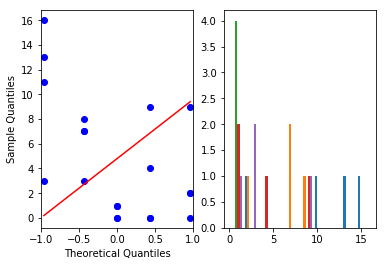

In [109]:
f, ax = plt.subplots(1, 2)
dfcat2=dfcat[['2015','2016','2017','2018']].copy()
qqplot(dfcat2, line='s', ax = ax[0])
ax[1] = plt.hist(dfcat2)
for a in [0.05, 0.01]:
    s, p = shapiro(dfcat2)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

Podemos observar que los datos de la categria tampoco estar normales.

## Modelo lineal

Empezamos con la modelacion lineal, suponiendo que la categoria es una consecuencia del pais de los creadores del clip.
Se probo la relación lineal por año, y tambien la total.

In [110]:
import matplotlib.pyplot as plt
from scipy import stats

y = dfcat['2015']
x = dfpais['2015'] 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]
a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

y = f(x) = 1.9545 x + -1.4636
('error', 0.8974251505426212)
('valor p', 0.11757517937281314)
pendiente no significativo
('R^2', 0.6125761993108931)


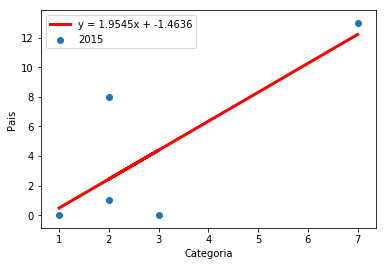

In [111]:
plt.plot(x, (a * x + b), label = 'y = {:.4f}x + {:.4f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Categoria")
plt.ylabel("Pais")
plt.show()

In [112]:
import matplotlib.pyplot as plt
from scipy import stats

y = dfcat['2016']
x = dfpais['2016'] 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]
a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

y = f(x) = 1.9512 x + -0.2439
('error', 0.4633076470424925)
('valor p', 0.024454336793225805)
pendiente significativo
('R^2', 0.8553291012362179)


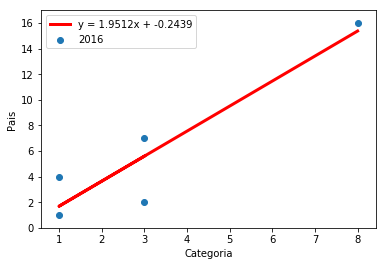

In [113]:
plt.plot(x, (a * x + b), label = 'y = {:.4f}x + {:.4f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Categoria")
plt.ylabel("Pais")
plt.show()

In [114]:
import matplotlib.pyplot as plt
from scipy import stats

y = dfcat['2017']
x = dfpais['2017'] 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]
a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

y = f(x) = 1.8333 x + 5.3667
('error', 1.7099924193031015)
('valor p', 0.36223895879468526)
pendiente no significativo
('R^2', 0.277014652014652)


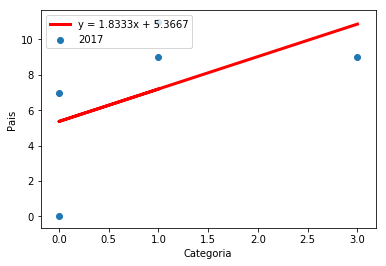

In [115]:
plt.plot(x, (a * x + b), label = 'y = {:.4f}x + {:.4f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Categoria")
plt.ylabel("Pais")
plt.show()

In [116]:
import matplotlib.pyplot as plt
from scipy import stats

y = dfcat['2018']
x = dfpais['2018'] 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]
a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

y = f(x) = 0.3936 x + 1.1277
('error', 0.3338798899250046)
('valor p', 0.32341836282824227)
pendiente no significativo
('R^2', 0.316604995374653)


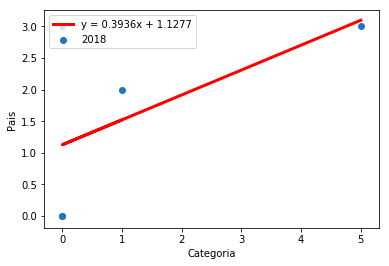

In [117]:
plt.plot(x, (a * x + b), label = 'y = {:.4f}x + {:.4f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Categoria")
plt.ylabel("Pais")
plt.show()

In [118]:
import matplotlib.pyplot as plt
from scipy import stats

y = dfcat['Total']
x = dfpais['Total'] 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]
a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

y = f(x) = 1.8778 x + 3.4261
('error', 0.5999372539983482)
('valor p', 0.052063036755892314)
pendiente no significativo
('R^2', 0.7655753541791265)


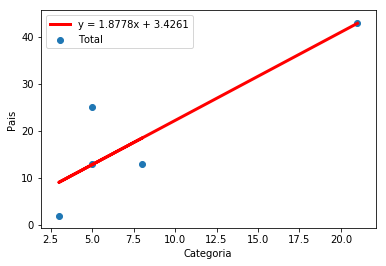

In [119]:
plt.plot(x, (a * x + b), label = 'y = {:.4f}x + {:.4f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Categoria")
plt.ylabel("Pais")
plt.show()

La pendiente fue no significativa a excepcion del año 2016, estoy fue determinante para predecir el total. 
Entonces como no hubo una fuerte significancia determinaremos lo opuesto, es decir, la categoria no esta relacionada con el pais de procedencia.

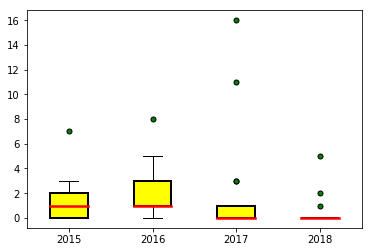

In [120]:
bp = dict(linestyle='-', linewidth = 2, color='black', facecolor='yellow')
fp = dict(marker = 'o', markerfacecolor = 'green', markersize = 5, linestyle = 'none')
mp = dict(linestyle = '-', linewidth = 2.5, color ='red')
plt.boxplot([dfpais['2015'], dfpais['2016'],dfpais['2017'],dfpais['2018']], labels=["2015", "2016", "2017", "2018"], \
            boxprops = bp, flierprops = fp, medianprops = mp, patch_artist = True)
plt.show()

En esta gráfica podemos deteminar que en 2017 fue el año en el que mas gente extranjera de un solo pais participó en el concurso.

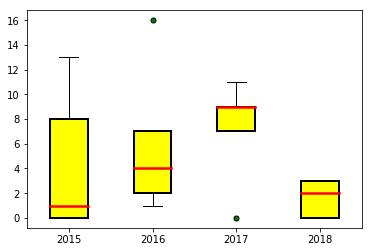

In [121]:
bp = dict(linestyle='-', linewidth = 2, color='black', facecolor='yellow')
fp = dict(marker = 'o', markerfacecolor = 'green', markersize = 5, linestyle = 'none')
mp = dict(linestyle = '-', linewidth = 2.5, color ='red')
plt.boxplot([dfcat['2015'], dfcat['2016'],dfcat['2017'],dfcat['2018']], labels=["2015", "2016", "2017", "2018"], \
            boxprops = bp, flierprops = fp, medianprops = mp, patch_artist = True)
plt.show()

En esta gráfica podemos deteminar que en 2017 fue el año en el que hubo más distribucion de participantes entre todas las categorías

## Conclusiones

Fue interesante aprender a usar la libreria mathplotlib, tuve menos problemas para trabajar con ésta libreria que con la de plotly. Tambíen logre hacer categorizaciones de los datos para poder tratarlos estadisticamente.

De los datos, pudimos determinar que en los años 2015, 2017, 2018 la categoria elegida no era significativa según el país de procedencia, pero en 2016 ocurrió que si era significativo. Al hacer los cálculos de todos los años juntos perdio la significancia. 
En el año 2017 hubo mas participacion extranjera de un solo país y además donde se participó con mayor uniformidad en las categorias disponibles. 

--11 de Marzo 2019-- Luis Angel Gutierrez Rodriguez 1484412